# Calculate global `hConvV` using `.exch.shift_face()`
Use xarray decorator for doing shifts on MITgcm LLC grid for deriving a global field of horizontal volume convergence (`hConvV`).

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ecco_read_utilities import *

In [3]:
from exch import *

## Open datasets

In [4]:
ds = open_ecco_variables('UVELMASS','VVELMASS')

In [5]:
ds

<xarray.Dataset>
Dimensions:   (face: 13, i2: 50, i3: 90, i4: 90, time: 240)
Coordinates:
  * i2        (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * i3        (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * i4        (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time      (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 ...
    hFacC     (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacW     (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacS     (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    XC        (face, i3, i4) float64 -111.6 -111.3 -110.9 -110.5 -110.0 ...
    YC        (face, i3, i4) float64 -88.24 -88.38 -88.52 -88.66 -88.8 ...
    XG        (face, i3, i4) float64 -115.0 -115.0 -115.0 -115.0 -115.0 ...
    YG        (face, i3, i4) float64 -88.18 -88.32 -88.46 -88.6 -88.74 ...
    RAC       (face, i3, i4) float64 3.623e+08 3.633e+08 3.64

### Grid dimensions

In [6]:
dxG = ds.DXG.load()
dyG = ds.DYG.load()
drF = ds.DRF.load()

In [7]:
rA = ds.RAC.load()
hFacC = ds.hFacC.load()

In [8]:
# Volume (m^3)
vol = (rA*drF*hFacC).transpose('face','i2','i3','i4')

### Horizontal convergence
- UVELMASS: U Mass-Weighted Comp of Velocity (m/s)
- VVELMASS: V Mass-Weighted Comp of Velocity (m/s)

In [9]:
UVELMASS = ds.sel(time='1995-12-16').UVELMASS.load()
VVELMASS = ds.sel(time='1995-12-16').VVELMASS.load()

In [10]:
UVELMASS

<xarray.DataArray 'UVELMASS' (face: 13, i2: 50, i3: 90, i4: 90)>
array([[[[      nan, ...,       nan],
         ..., 
         [ 0.056246, ...,  0.051365]],

        ..., 
        [[      nan, ...,       nan],
         ..., 
         [      nan, ...,       nan]]],


       ..., 
       [[[-0.05846 , ...,       nan],
         ..., 
         [-0.102175, ...,       nan]],

        ..., 
        [[      nan, ...,       nan],
         ..., 
         [      nan, ...,       nan]]]], dtype=float32)
Coordinates:
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i4       (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    time     datetime64[ns] 1995-12-16
    hFacC    (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacW    (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacS    (face, i2, i3, i4) float64 0.0 0.0 0

In [11]:
# Horizontal volume transports (m^3/s)
u_transport = UVELMASS * dyG * drF
v_transport = VVELMASS * dxG * drF

In [12]:
u_transport.values[np.isnan(u_transport.values)] = 0
v_transport.values[np.isnan(v_transport.values)] = 0

**Note**:
Positive offsets shift to the right; negative offsets shift to the left.
- array.shift(i4=-1): shifts array 1 grid point to the left (along x)
- array.shift(i3=-1): shifts array 1 grid point downward (along y)

In [15]:
u_transport.shift(i4=-1)

<xarray.DataArray (face: 13, i2: 50, i3: 90, i4: 90)>
array([[[[     0.      , ...,           nan],
         ..., 
         [ 37138.148546, ...,           nan]],

        ..., 
        [[     0.      , ...,           nan],
         ..., 
         [     0.      , ...,           nan]]],


       ..., 
       [[[-32254.197045, ...,           nan],
         ..., 
         [-63959.895321, ...,           nan]],

        ..., 
        [[     0.      , ...,           nan],
         ..., 
         [     0.      , ...,           nan]]]])
Coordinates:
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i4       (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    time     datetime64[ns] 1995-12-16
    hFacC    (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacW    (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacS  

In [13]:
u_transport.exch.shift_face(i4=-1)

AttributeError: 'module' object has no attribute 'concatenate'

In [17]:
# Convergence of the horizontal flow (1/s)
hConvV = -(u_transport.shift(i4=-1) - u_transport + \
           v_transport.shift(i3=-1) - v_transport)/vol

/home/tesdal/.local/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in divide
  if not reflexive


In [16]:
# Convergence of the horizontal flow (1/s)
hConvV = -(u_transport.exch.shift_face(i4=-1) - u_transport + \
           v_transport.exch.shift_face(i3=-1) - v_transport)/vol

AttributeError: 'module' object has no attribute 'concatenate'

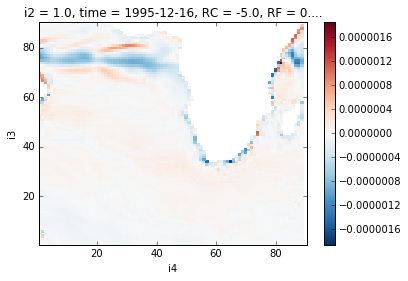

In [18]:
hConvV[1,0].plot()

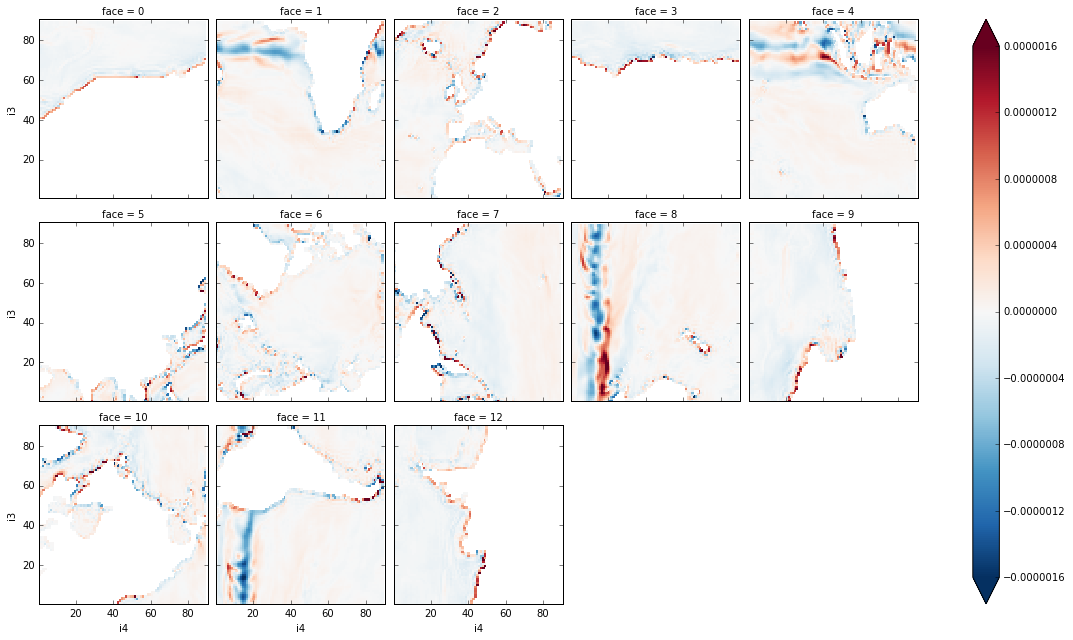

In [28]:
plt.figure(figsize=(14,10))
hConvV[:,0].plot(col='face', col_wrap=5, vmin=-1.6e-6)

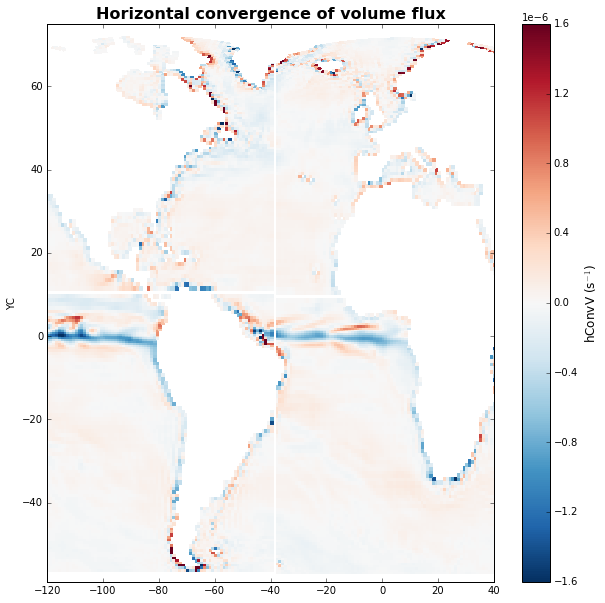

In [39]:
fig, ax = plt.subplots(figsize=(10,10))

p = hConvV[2,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=-1.6e-6, vmax=1.6e-6, cmap='RdBu_r')
hConvV[10,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=-1.6e-6, vmax=1.6e-6, cmap='RdBu_r')
hConvV[1,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=-1.6e-6, vmax=1.6e-6, cmap='RdBu_r')
hConvV[11,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=-1.6e-6, vmax=1.6e-6, cmap='RdBu_r')
ax.set_xlim((-120,40))
ax.set_ylim((-59,75))
ax.set_xlabel('')
ax.set_title('Horizontal convergence of volume flux', fontsize=16, fontweight='bold')

cbar = fig.colorbar(p, ax=ax, ticks=1e-6 * np.linspace(-1.6,1.6,9))
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
cbar.set_label(r'hConvV (s$^{-1}$)', fontsize=12)

plt.show()